In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = {
    'date': [
        '01.01.24', '01.12.23', '01.11.23', '01.10.23', '01.09.23', 
        '01.08.23', '01.07.23', '01.06.23', '01.05.23', '01.04.23', 
        '01.03.23', '01.02.23'
    ],
    'Starting (USD)': [
        '16,800', '15,900', '15,800', '16,100', '16,300', 
        '16,800', '15,900', '15,800', '16,150', '16,300', 
        '16,200', '16,300'
    ],
    'Ending (USD)': [
        '16,500', '16,100', '15,300', '16,200', '15,700', 
        '16,400', '16,200', '15,500', '16,100', '15,800', 
        '16,200', '15,700'
    ]
}

In [5]:
df = pd.DataFrame(data)
df

,date,Starting (USD),Ending (USD)
0,01.01.24,"16,800","16,500"
1,01.12.23,"15,900","16,100"
2,01.11.23,"15,800","15,300"
3,01.10.23,"16,100","16,200"
4,01.09.23,"16,300","15,700"
5,01.08.23,"16,800","16,400"
6,01.07.23,"15,900","16,200"
7,01.06.23,"15,800","15,500"
8,01.05.23,"16,150","16,100"
9,01.04.23,"16,300","15,800"


In [51]:
x = np.array([16800, 15900, 15800, 16100, 16300, 16800, 15900, 15800, 16150, 16300, 16200, 16300])
y = np.array([16500, 16100, 15300, 16200, 15700, 16400, 16200, 15500, 16100, 15800, 16200, 15700])

In [69]:
# Convert to numeric
X = pd.to_numeric(df['Starting (USD)'], errors='coerce').values.reshape(-1, 1)
y = pd.to_numeric(df['Ending (USD)'], errors='coerce').values

In [70]:
# Remove missing values
df = df.dropna()
X = df['Starting (USD)'].values.reshape(-1, 1)
y = df['Ending (USD)'].values

In [52]:
df.head()

,Starting (USD),Ending (USD)
0,16800.0,16500.0
1,15900.0,16100.0
2,15800.0,15300.0
3,16100.0,16200.0
4,16300.0,15700.0


In [53]:
df.tail()

,Starting (USD),Ending (USD)
7,15800.0,15500.0
8,16150.0,16100.0
9,16300.0,15800.0
10,16200.0,16200.0
11,16300.0,15700.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            12 non-null     object
 1   Starting (USD)  12 non-null     object
 2   Ending (USD)    12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes


In [9]:
df.isnull().sum()

date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [10]:
df.describe().T

,count,unique,top,freq
date,12,12,01.01.24,1
Starting (USD),12,7,"16,300",3
Ending (USD),12,8,"16,200",3


In [11]:
x = df[['Starting (USD)']]
Y = df['Ending (USD)']

In [13]:
#df.drop('Date', axis=1)
df = df.drop(columns = ['date'])

In [14]:
df

,Starting (USD),Ending (USD)
0,"16,800","16,500"
1,"15,900","16,100"
2,"15,800","15,300"
3,"16,100","16,200"
4,"16,300","15,700"
5,"16,800","16,400"
6,"15,900","16,200"
7,"15,800","15,500"
8,"16,150","16,100"
9,"16,300","15,800"


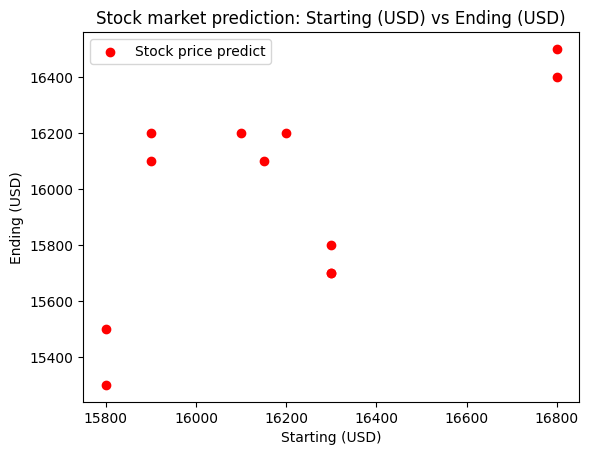

In [54]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'], marker='o', color='red', label='Stock price predict')
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock market prediction: Starting (USD) vs Ending (USD)')
plt.legend()
plt.show()

In [55]:
x = df.drop('Ending (USD)', axis=1)

In [56]:
x.head()

,Starting (USD)
0,16800.0
1,15900.0
2,15800.0
3,16100.0
4,16300.0


In [57]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500.0
1,16100.0
2,15300.0
3,16200.0
4,15700.0


# Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [71]:
reg = LinearRegression()
reg.fit(x, y) #train the ml model

LinearRegression()

In [72]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [73]:
y.mean()

15975.0

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

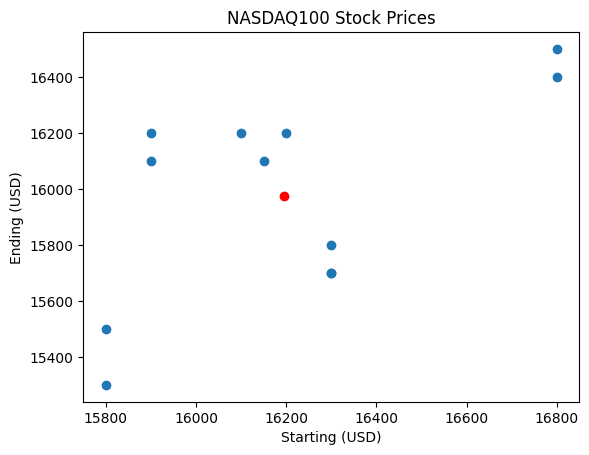

In [74]:
plt.scatter(starting_mean , ending_mean, color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [75]:
reg.fit(x, y) #train the ml model

LinearRegression()

In [76]:
m = reg.coef_
m

array([0.65258293])

In [77]:
c = reg.intercept_
c

5405.875557022609

# y = mx + c

In [78]:
m*16700 + c

array([16304.0105628])

In [80]:
reg.predict([[16700]])

array([16304.0105628])

In [81]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800.0,16500.0,16369.268856
1,15900.0,16100.0,15781.944215
2,15800.0,15300.0,15716.685922
3,16100.0,16200.0,15912.460802
4,16300.0,15700.0,16042.977389


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

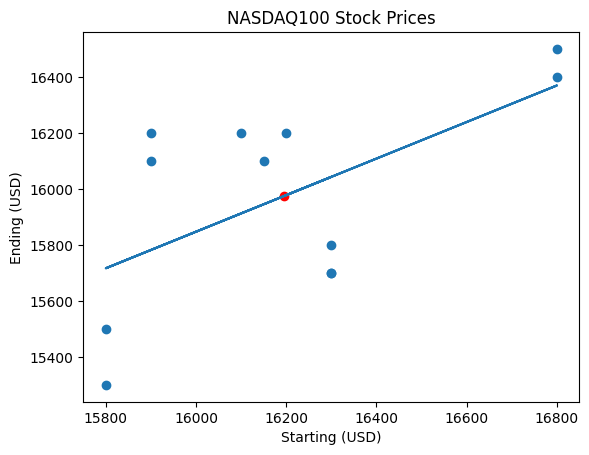

In [82]:
#plt.plot(x, df['Predicted_y'])
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [83]:
reg.predict([[16600]])

array([16238.75226935])

In [84]:
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800.0,16500.0,16369.268856
1,15900.0,16100.0,15781.944215
2,15800.0,15300.0,15716.685922
3,16100.0,16200.0,15912.460802
4,16300.0,15700.0,16042.977389


# Loss and Cost Function

In [85]:
df['loss'] = df['Ending (USD)'] - df['Predicted_y']

In [86]:
df.head()

,Starting (USD),Ending (USD),Predicted_y,loss
0,16800.0,16500.0,16369.268856,130.731144
1,15900.0,16100.0,15781.944215,318.055785
2,15800.0,15300.0,15716.685922,-416.685922
3,16100.0,16200.0,15912.460802,287.539198
4,16300.0,15700.0,16042.977389,-342.977389


# MSE & MAE

In [87]:
#MSE and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [88]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [89]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

In [90]:
sum(abs(df['loss'])) / len(x)  # calculates the Mean Absolute Error (MAE)

260.3840017604666

In [91]:
reg.score(x,y)  # calculates the R-squared score

0.3577804940272571

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

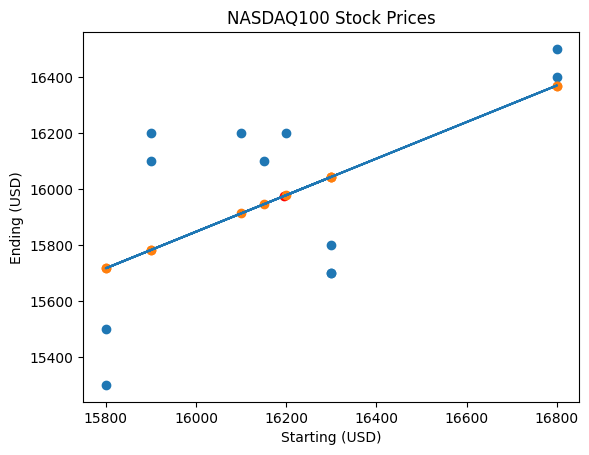

In [92]:
#plt.plot(x, df['Predicted_y'])
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.scatter(df['Starting (USD)'] , reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [93]:
reg.score(x,y)

0.3577804940272571

# r2_score

In [94]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571